In [93]:
# Import
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import pandas as pd

In [94]:
df = pd.read_csv("Wage.csv")

In [95]:
df_age = df["age"]
df_wage = df["wage"]


In [96]:
df_final = pd.concat([df_age, df_wage], axis=1)

In [97]:
df_final

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154
5,54,127.115744
6,44,169.528538
7,30,111.720849
8,41,118.884359
9,52,128.680488


In [98]:
df_age_square = df_final

In [99]:
df_age_square["age^2"] =  (df_final["age"]**2)

In [100]:
df_age_target = df_age_square["wage"]

In [101]:
df_age_square = df_age_square.drop(["wage"],axis = 1)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(df_age,df_wage,test_size = 0.2)


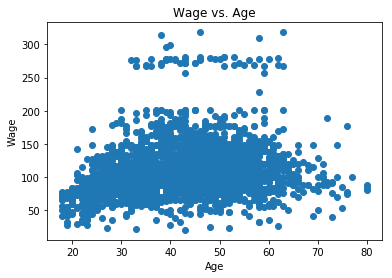

In [103]:
#visualizing data
plt.scatter(x_train,y_train)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Wage vs. Age")
plt.show()

In [104]:
# applying simple OLS
train_model = sm.OLS(y_train, x_train).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:34:08   Log-Likelihood:                -12548.
No. Observations:                2400   AIC:                         2.510e+04
Df Residuals:                    2399   BIC:                         2.510e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            2.4831      0.021    118.372      0.000       2.442       2.524
==============================================================================
Omnibus:                      335.725   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.974
Skew:                           0.747   Prob(JB):                    4.21e-203
Kurtosis:                       5.662   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#printing OLS MSE, we will compare this to the next 
y_pred = train_model.predict(x_test)
mse_train = mean_squared_error(y_test, y_pred) 
mse_train

2532.2109509004995

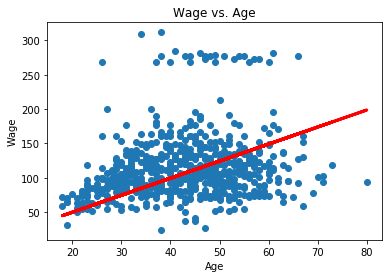

In [106]:
#visualizing OLS line of best fit 
plt.scatter(x_test,y_test)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Wage vs. Age")
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.show()

# Polynomial Regression 

In [107]:
# implementation by hand 

x_train_age,x_test_age,y_train_age,y_test_age = train_test_split(df_age_square,df_age_target,test_size = 0.2)



In [108]:
# applying simple OLS
train_model = sm.OLS(y_train_age, x_train_age).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     9343.
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        10:34:09   Log-Likelihood:                -12272.
No. Observations:                2400   AIC:                         2.455e+04
Df Residuals:                    2398   BIC:                         2.456e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            4.8426      0.084     57.448      0.000       4.677       5.008
age^2         -0.0484      0.002    -28.498      0.000      -0.052      -0.045
==============================================================================
Omnibus:                      875.097   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3906.098
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       8.228   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#printing OLS MSE, we will compare this to the next 
y_pred_age_square = train_model.predict(x_test_age)
mse_train_age_square = mean_squared_error(y_test, y_pred_age_square) 
mse_train_age_square

2326.676001049384

In [110]:
# reshaping data to avoid dimensional mismatch
x_train_poly = x_train.reshape(-1,1)
x_test_poly = x_test.reshape(-1,1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
x_train_poly

array([[52],
       [30],
       [40],
       ...,
       [62],
       [53],
       [30]])

### How Polynomial Features work...

This function generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degre. If an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [112]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_train_poly)
X_test_poly = poly.fit_transform(x_test_poly)

In [113]:
X_poly

array([[1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 4.000e+01, 1.600e+03],
       ...,
       [1.000e+00, 6.200e+01, 3.844e+03],
       [1.000e+00, 5.300e+01, 2.809e+03],
       [1.000e+00, 3.000e+01, 9.000e+02]])

In [114]:
poly_model = sm.OLS(y_train,X_poly).fit()


In [115]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.70e-47
Time:                        10:34:10   Log-Likelihood:                -12171.
No. Observations:                2400   AIC:                         2.435e+04
Df Residuals:                    2397   BIC:                         2.437e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2515      8.763     -1.170      0.242     -27.435       6.932
x1             5.2794      0.416     12.697      0.000       4.464       6.095
x2            -0.0531      0.005    -11.217      0.000      -0.062      -0.044
==============================================================================
Omnibus:                      859.773   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3967.163
Skew:                           1.665   Prob(JB):                         0.00
Kurtosis:                       8.346   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## That's Wierd...
The R^2 just became really, bad. Don't worry, R-squared cannot be compared between a model with untransformed Y and one with transformed Y, or between different transformations of Y. R-squared can easily go down when the model assumptions are better fulfilled. 

*So MSE is a much better predictor in this context*

In [116]:
#notice how the mse reduces
y_pred_poly = poly_model.predict(X_test_poly)
mse_train = mean_squared_error(y_test, y_pred_poly) 
mse_train

2042.208262916635

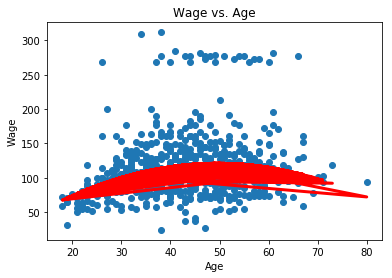

In [117]:
#visualizing line of best fit 
plt.scatter(x_test,y_test)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Wage vs. Age")
plt.plot(x_test_poly, y_pred_poly, color='red', linewidth=3)
plt.show()